In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [4]:
file_path = '/Users/spencertrinh/Documents/datafiles/etape_carboy_readings.csv'
dfm = pd.read_csv(file_path)

In [5]:
dfm

,volume,ADC,voltage,carboy
0,0,33152,1.669361,small
1,1,33472,1.685479,small
2,2,34112,1.717702,small
3,3,35840,1.807938,small
4,4,37952,1.911064,small
5,5,40000,2.014191,small
6,6,42624,2.143099,small
7,7,49664,2.500819,small
8,0,32576,1.640357,large
9,2,32576,1.643580,large


In [6]:
d_sm = dfm.loc[dfm['carboy']=='small']

In [12]:
d_sm.reset_index()

,index,volume,ADC,voltage,carboy
0,0,0,33152,1.669361,small
1,1,1,33472,1.685479,small
2,2,2,34112,1.717702,small
3,3,3,35840,1.807938,small
4,4,4,37952,1.911064,small
5,5,5,40000,2.014191,small
6,6,6,42624,2.143099,small
7,7,7,49664,2.500819,small


In [8]:
d_lg = dfm.loc[dfm['carboy']=='large']

In [10]:
d_lg.reset_index()

,index,volume,ADC,voltage,carboy
0,8,0,32576,1.640357,large
1,9,2,32576,1.643580,large
2,10,3,33024,1.653248,large
3,11,4,33472,1.679030,large
4,12,5,33920,1.708034,large
5,13,6,34368,1.730593,large
6,14,7,34752,1.749929,large
7,15,8,34752,1.759597,large
8,16,9,35456,1.775711,large
9,17,10,36096,1.820829,large


In [84]:
y_sm = d_sm['volume'][:, np.newaxis]
x_sm = d_sm['voltage'][:, np.newaxis]

poly_feat_sm = PolynomialFeatures(degree=2)
x_poly_sm = poly_feat_sm.fit_transform(x_sm)

model_sm = LinearRegression()
model_sm.fit(x_poly_sm, y_sm)
y_poly_pred_sm = model_sm.predict(x_poly_sm)

rmse_sm = np.sqrt(mean_squared_error(y_sm,y_poly_pred_sm))
r2_sm = r2_score(y_sm,y_poly_pred_sm)
print(rmse_sm)
print(r2_sm)

0.3236587466118669
0.9800466696650734


In [15]:
x_lg = d_lg['volume'][:, np.newaxis]
y_lg = d_lg['voltage'][:, np.newaxis]

poly_feat_lg = PolynomialFeatures(degree=2)
x_poly_lg = poly_feat_lg.fit_transform(x_lg)

model_lg = LinearRegression()
model_lg.fit(x_poly_lg, y_lg)
y_poly_pred_lg = model_lg.predict(x_poly_lg)

rmse_lg = np.sqrt(mean_squared_error(y_lg,y_poly_pred_lg))
r2_lg = r2_score(y_lg,y_poly_pred_lg)
print(rmse_lg)
print(r2_lg)

0.023903256621972305
0.9905785705132241


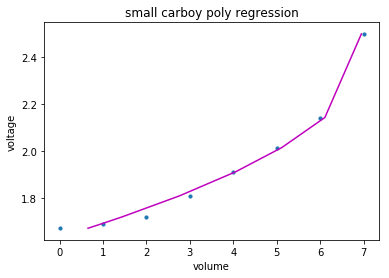

In [99]:
fig= plt.figure()
plt.scatter(y_sm, x_sm, s=10)
plt.plot(y_poly_pred_sm, x_sm , color='m')
plt.title('small carboy poly regression')
plt.ylabel('voltage')
plt.xlabel('volume')
plt.show()

In [27]:
print(model_lg.coef_[0],model_lg.intercept_[0])

[0.         0.00442863 0.00094004] 1.6526255318131953


In [28]:
print(model_sm.coef_[0],model_sm.intercept_[0])

[ 0.         -0.02620411  0.01922116] 1.6865508274583332


In [85]:
#polynomial_features_sm = PolynomialFeatures(degree=2, include_bias=False)
#x_poly_train_sm = polynomial_features_sm.fit_transform(x_sm)

# train a linear model with higher degree features
model_sm = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression())
model_sm.fit(x_sm, y_sm)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [87]:
a,b = model_sm.named_steps['linearregression'].coef_[0]

In [88]:
c = model_sm.named_steps['linearregression'].intercept_[0]

In [102]:
np.random.uniform(1.5,3,1)

array([2.6931723])

In [106]:
import random
for _ in range(5):
    a_rand = np.random.uniform(1.5,3,1)
    print(f'{a_rand} -> {model_sm.predict(a_rand.reshape(1,-1))}')

[1.65772929] -> [[0.45808342]]
[1.89208086] -> [[3.83430284]]
[1.65531883] -> [[0.4170685]]
[2.608705] -> [[6.64939582]]
[2.66486485] -> [[6.39180806]]


In [91]:
model_sm.predict(np.array([2.23]).reshape(1,-1))

array([[6.57180256]])